# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_all = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

In [6]:
for data in df_all:
  print(f"The shape for is {data.shape}, num of rows is {data.shape[0]} and columsn {data.shape[1]}.")
  print(f"The columns names are {data.columns}")
  print(f"Any nan value: {data.isna().any()} or duplicates: {data.duplicated().any()}.\n")


The shape for is (29322, 3), num of rows is 29322 and columsn 3.
The columns names are Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Any nan value: Geographic Area    False
City               False
Median Income       True
dtype: bool or duplicates: False.

The shape for is (29329, 3), num of rows is 29329 and columsn 3.
The columns names are Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Any nan value: Geographic Area    False
City               False
poverty_rate       False
dtype: bool or duplicates: False.

The shape for is (29329, 3), num of rows is 29329 and columsn 3.
The columns names are Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Any nan value: Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool or duplicates: False.

The shape for is (29268, 7), num of rows is 29268 and columsn 7.
The columns names are Index(['Geographic area', 'City', 'share_white', 'sh

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [7]:
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_share_race_city = df_share_race_city.fillna(0)
df_fatalities = df_fatalities.fillna(0)

In [8]:
df_fatalities.isna().sum().any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [9]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-", 0)
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(str).astype(float)
# df_pct_poverty
df_poverty_bar = df_pct_poverty.groupby("Geographic Area").mean(numeric_only=False)
df_poverty_bar
# df_poverty_bar
bar1 = px.bar(x=df_poverty_bar.index, y=df_poverty_bar.poverty_rate, title='Poverty Rate')
bar1.update_layout(xaxis_title='Category', yaxis_title='Value')
bar1.show()

<ipython-input-9-864695d1ca5c>:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_poverty_bar = df_pct_poverty.groupby("Geographic Area").mean(numeric_only=False)


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [10]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace("-", 0)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(str).astype(float)

df_graduation_rate = df_pct_completed_hs.groupby("Geographic Area", as_index=False).mean()
# print(df_graduation_rate.sort_values(by="percent_completed_hs", ascending=False))
print(f"The highest is {df_graduation_rate.iloc[df_graduation_rate['percent_completed_hs'].idxmax()]['Geographic Area']} with {df_graduation_rate.iloc[df_graduation_rate['percent_completed_hs'].idxmax()][1]}")
print(f"The lowest is {df_graduation_rate.iloc[df_graduation_rate['percent_completed_hs'].idxmin()]['Geographic Area']} with {df_graduation_rate.iloc[df_graduation_rate['percent_completed_hs'].idxmin()][1]}")

The highest is MA with 92.02845528455285
The lowest is TX with 74.08694905552375


<ipython-input-10-3fc7f4c82e30>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
x = df_graduation_rate['percent_completed_hs'].idxmax()
y = df_graduation_rate.iloc[1]
y[0]

'AL'

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [12]:
print(df_poverty_bar[:5]) # Poverty
df_graduation_rate[:5] # Graduation rate

                 poverty_rate
Geographic Area              
AK                      18.68
AL                      20.61
AR                      22.96
AZ                      25.27
CA                      16.89


,Geographic Area,percent_completed_hs
0,AK,80.10
1,AL,80.16
2,AR,79.95
3,AZ,79.22
4,CA,80.82


Text(0, 0.5, 'graduation level')

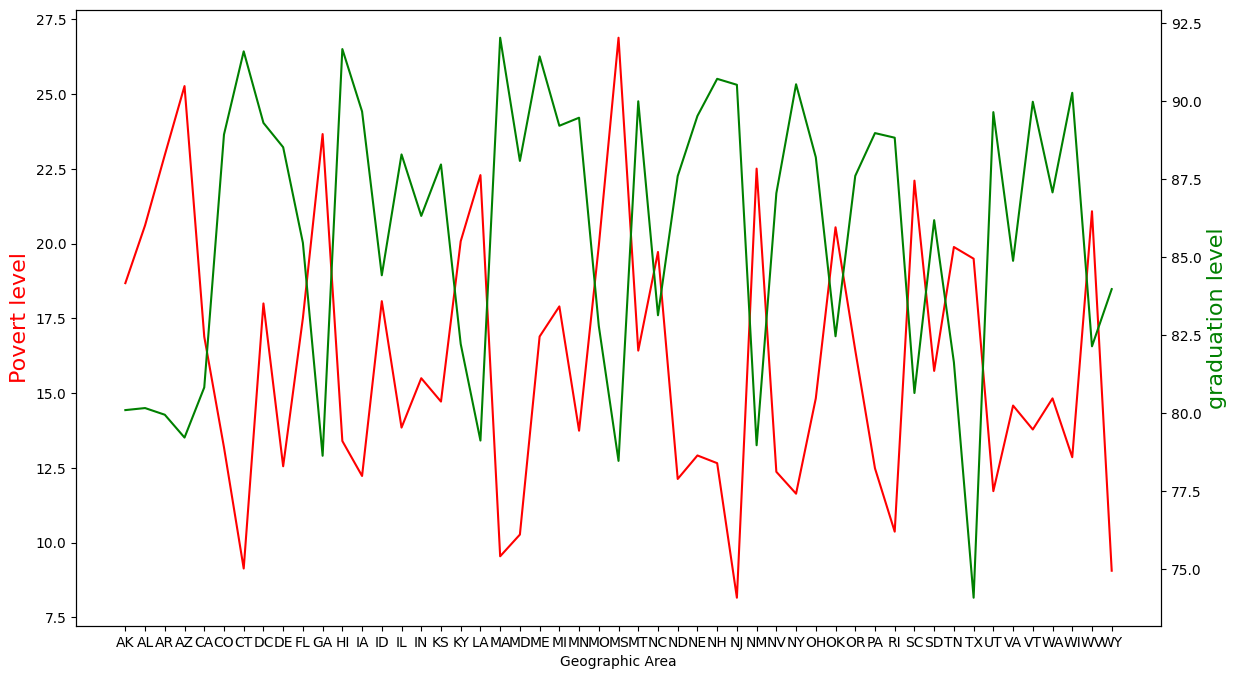

In [ ]:
plt.figure(figsize=[14,8])

ax1=plt.gca()
ax2=ax1.twinx()

ax1.plot(df_poverty_bar.index, df_poverty_bar.poverty_rate, color="red")
ax2.plot(df_graduation_rate["Geographic Area"], df_graduation_rate.percent_completed_hs, color="green")

ax1.set_xlabel("Geographic Area")
ax1.set_ylabel("Povert level", color="red", size=16)
ax2.set_ylabel("graduation level", color="green", size=16)


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

Text(0, 0.5, 'graduation level')

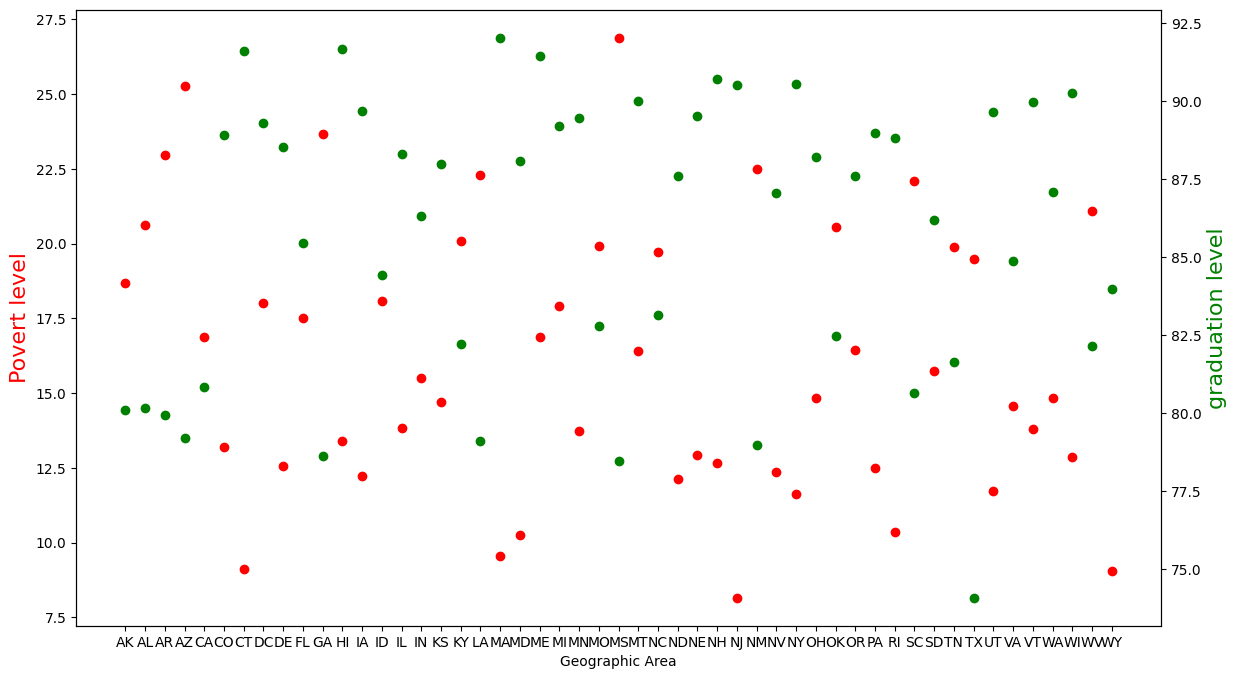

In [ ]:
plt.figure(figsize=[14,8])

ax1=plt.gca()
ax2=ax1.twinx()

ax1.scatter(df_poverty_bar.index, df_poverty_bar.poverty_rate, color="red")
ax2.scatter(df_graduation_rate["Geographic Area"], df_graduation_rate.percent_completed_hs, color="green")

ax1.set_xlabel("Geographic Area")
ax1.set_ylabel("Povert level", color="red", size=16)
ax2.set_ylabel("graduation level", color="green", size=16)


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [ ]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00
29325,WY,Worland city,85.60
29326,WY,Wright town,89.20
29327,WY,Yoder town,79.40


In [13]:
df_pvoert_graduation_combine = df_pct_poverty.insert(3, "Graduation", df_pct_completed_hs["percent_completed_hs"])

In [14]:
df_pct_poverty['Graduation']

0        21.20
1        69.10
2        78.90
3        81.40
4        68.60
         ...  
29324   100.00
29325    85.60
29326    89.20
29327    79.40
29328   100.00
Name: Graduation, Length: 29329, dtype: float64

In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate,Graduation
0,AL,Abanda CDP,78.80,21.20
1,AL,Abbeville city,29.10,69.10
2,AL,Adamsville city,25.50,78.90
3,AL,Addison town,30.70,81.40
4,AL,Akron town,42.00,68.60
...,...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60,100.00
29325,WY,Worland city,15.30,85.60
29326,WY,Wright town,5.90,89.20
29327,WY,Yoder town,5.40,79.40


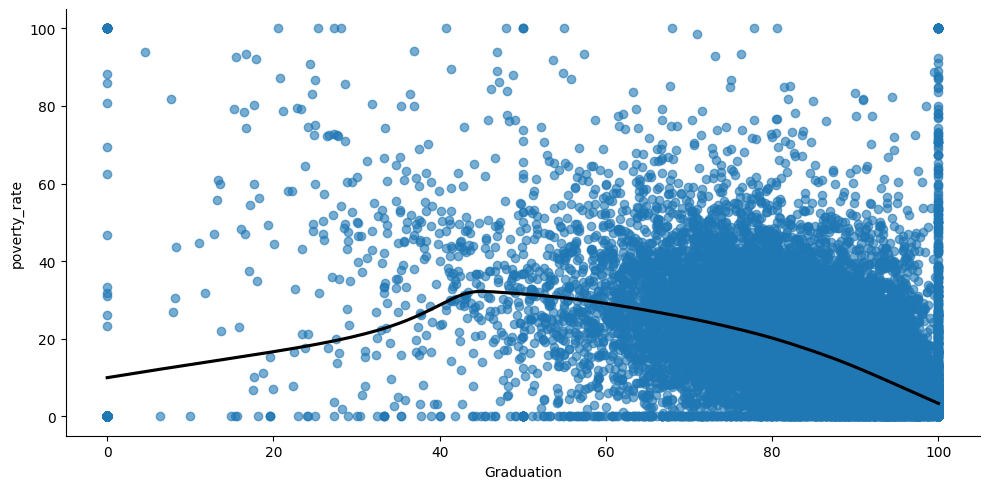

In [ ]:
sns.lmplot(data=df_pct_poverty,
           x="Graduation",
           y="poverty_rate",
           lowess=True,
           aspect=2,
           scatter_kws = {'alpha': 0.6},
           line_kws = {'color': 'black'},
           )

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [15]:
df_share_race_city[df_share_race_city["Geographic area"] == "AL"].mean()

<ipython-input-15-7efd80175a33>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Series([], dtype: float64)

In [16]:
df_share_race_city["share_white"] = df_share_race_city["share_white"].replace("(X)", 0)
df_share_race_city["share_black"] = df_share_race_city["share_black"].replace("(X)", 0)
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].replace("(X)", 0)
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].replace("(X)", 0)
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].replace("(X)", 0)
df_share_race_city["share_white"] = df_share_race_city["share_white"].astype(str).astype(float)
df_share_race_city["share_black"] = df_share_race_city["share_black"].astype(str).astype(float)
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].astype(str).astype(float)
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].astype(str).astype(float)
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].astype(str).astype(float)

In [17]:
nigger_bar = df_share_race_city.groupby("Geographic area").mean()
fig = px.bar(nigger_bar,
             x=nigger_bar.index,
             y=['share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic'],
             title='Racial Percentage by Area')
fig.update_layout(xaxis_title="Geographic area",
                  yaxis_title="Racial Percentage")
fig.show()

<ipython-input-17-4673d1f500cf>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_race_killed = df_fatalities.groupby("race").count()
fig = px.pie(df_race_killed,
             labels=df_race_killed.index,
             names=df_race_killed.index,
             values=df_race_killed.manner_of_death,
             title="Death by Race",
             hole=0.5)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [18]:
men_women = df_fatalities.groupby("gender").count()
men_women

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,107,107,107,107,107,107,107,107
M,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [19]:
df_male = df_fatalities[df_fatalities["gender"] == "M"]
df_female = df_fatalities[df_fatalities["gender"] == "F"]

<Axes: xlabel='manner_of_death', ylabel='age'>

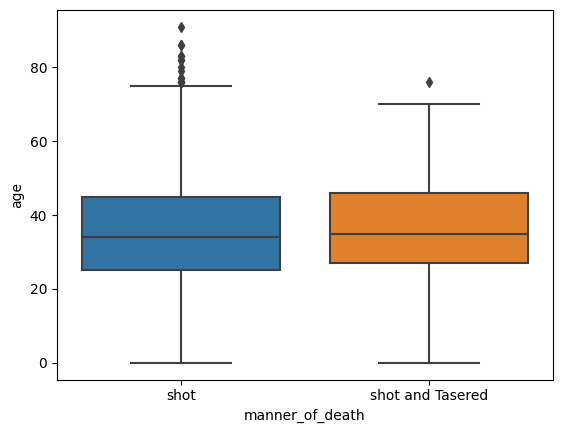

In [ ]:
sns.boxplot(data=df_male, x="manner_of_death", y="age")

<Axes: xlabel='manner_of_death', ylabel='age'>

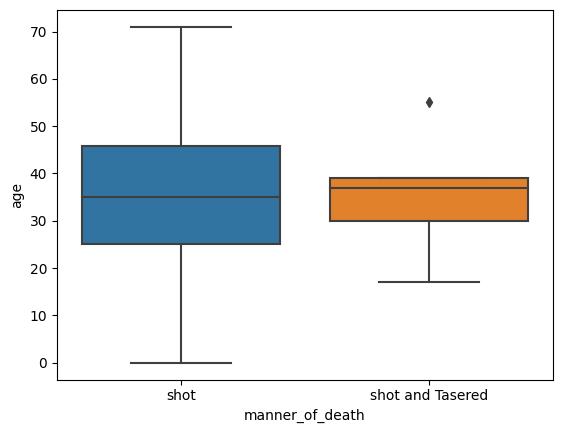

In [ ]:
sns.boxplot(data=df_female, x="manner_of_death", y="age")

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [20]:
df_weapons = df_fatalities.armed.value_counts()
df_weapons['gun']
armed_percentage = (df_weapons['gun'] / len(df_fatalities)) * 100
print(armed_percentage)

55.14792899408284


In [ ]:
fig = px.pie(df_weapons,
             labels=df_weapons.index,
             names=df_weapons.index,
             values=df_weapons,
             title="Death by Race",
             hole=0.5)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
print(f"People that were armed with gun: {df_weapons['gun']}")
print(f"People that were armed with gun: {df_weapons['unarmed']}")

People that were armed with gun: 1398
People that were armed with gun: 171


# How Old Were the People Killed?

In [ ]:
df_fatalities[:2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


Work out what percentage of people killed were under 25 years old.  

In [21]:
df_fatalities['age'] = df_fatalities['age'].astype(str).astype(float)
df_age = df_fatalities.groupby("age", as_index=False).count()
df_age.sort_values(by='age', ascending=True)
sum_before_25 = df_age[df_age["age"] <= 25]["id"].sum()
total_num_of_ppl = df_age["age"].sum()
print(f"Percenteage of ppl killed younger/equal to 25 is: {((sum_before_25/total_num_of_ppl) * 100).round(2)}")

Percenteage of ppl killed younger/equal to 25 is: 18.29


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
df_age

,age,id,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0.00,77,77,77,77,77,77,77,77,77,77,77,77,77
1,6.00,1,1,1,1,1,1,1,1,1,1,1,1,1
2,12.00,1,1,1,1,1,1,1,1,1,1,1,1,1
3,13.00,1,1,1,1,1,1,1,1,1,1,1,1,1
4,14.00,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,80.00,1,1,1,1,1,1,1,1,1,1,1,1,1
70,82.00,2,2,2,2,2,2,2,2,2,2,2,2,2
71,83.00,2,2,2,2,2,2,2,2,2,2,2,2,2
72,86.00,2,2,2,2,2,2,2,2,2,2,2,2,2


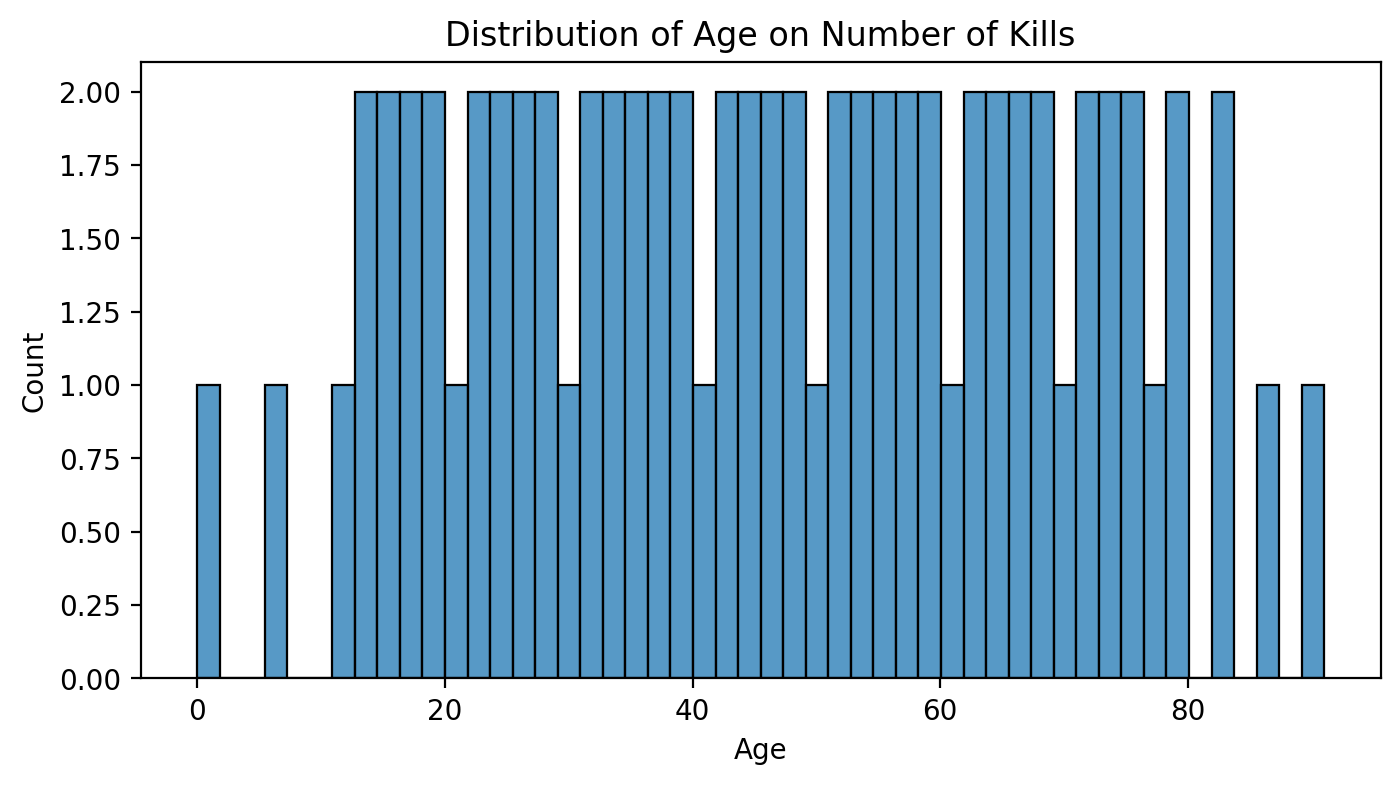

In [ ]:
plt.figure(figsize=[8, 4], dpi=200)
sns.histplot(data=df_age,
             x=df_age.age,
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Number of Kills')
plt.show()

In [ ]:
df_age

,age,id,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0.00,77,77,77,77,77,77,77,77,77,77,77,77,77
1,6.00,1,1,1,1,1,1,1,1,1,1,1,1,1
2,12.00,1,1,1,1,1,1,1,1,1,1,1,1,1
3,13.00,1,1,1,1,1,1,1,1,1,1,1,1,1
4,14.00,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,80.00,1,1,1,1,1,1,1,1,1,1,1,1,1
70,82.00,2,2,2,2,2,2,2,2,2,2,2,2,2
71,83.00,2,2,2,2,2,2,2,2,2,2,2,2,2
72,86.00,2,2,2,2,2,2,2,2,2,2,2,2,2


(0.0, 91.0)

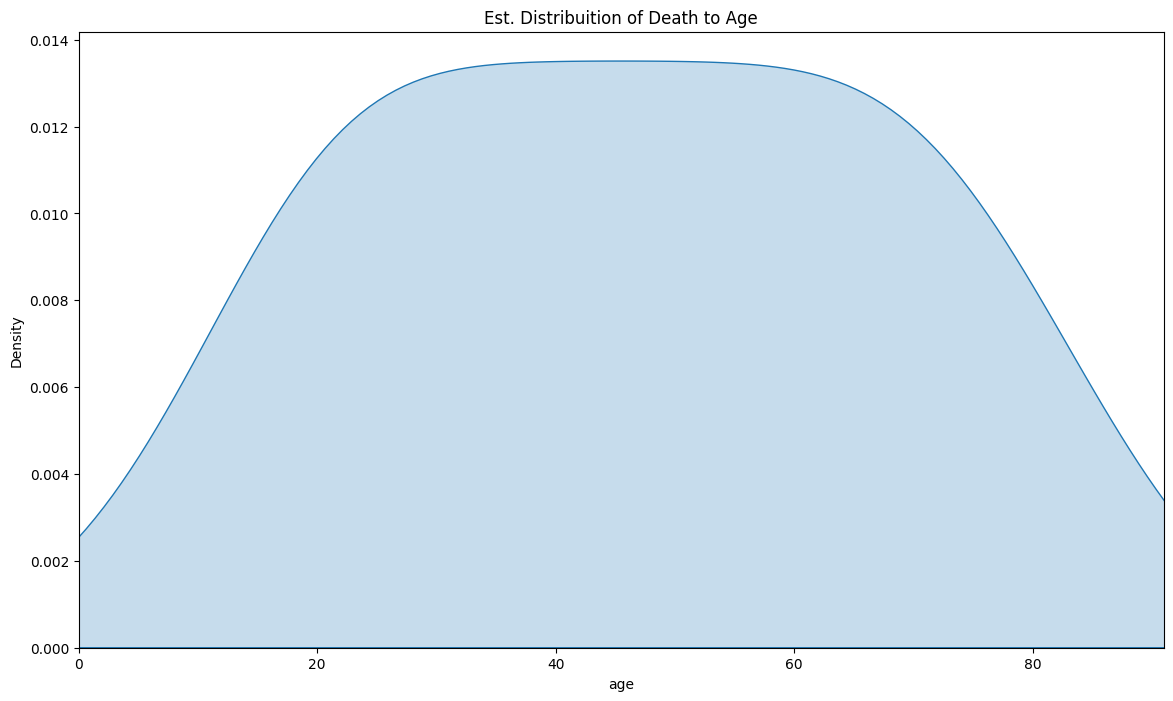

In [ ]:
plt.figure(figsize=(14,8))

sns.kdeplot(data=df_age,
            x="age",
            fill=True)
plt.title('Est. Distribuition of Death to Age')
plt.xlim(0, df_age.age.max())

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [ ]:
df_fatalities[:2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


In [ ]:
df_fatalities[df_fatalities["race"]=="A"]

<ipython-input-43-5aad24167a7a>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7d933f3d5b40> (for post_execute):


KeyboardInterrupt: ignored

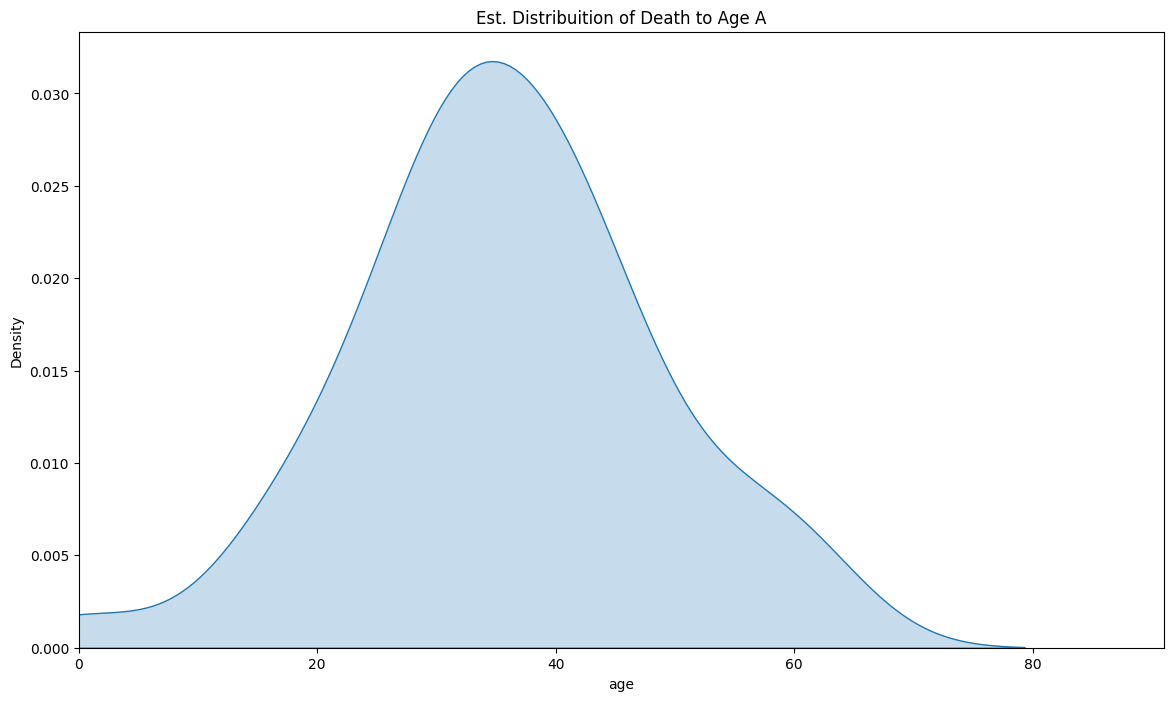

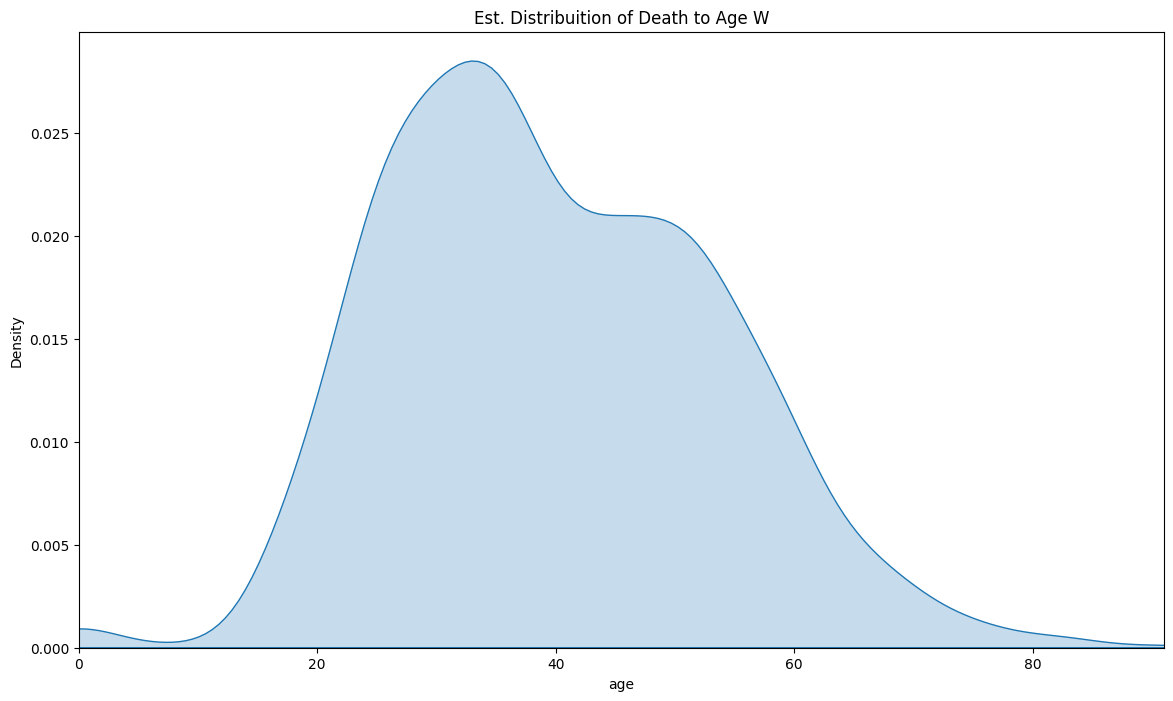

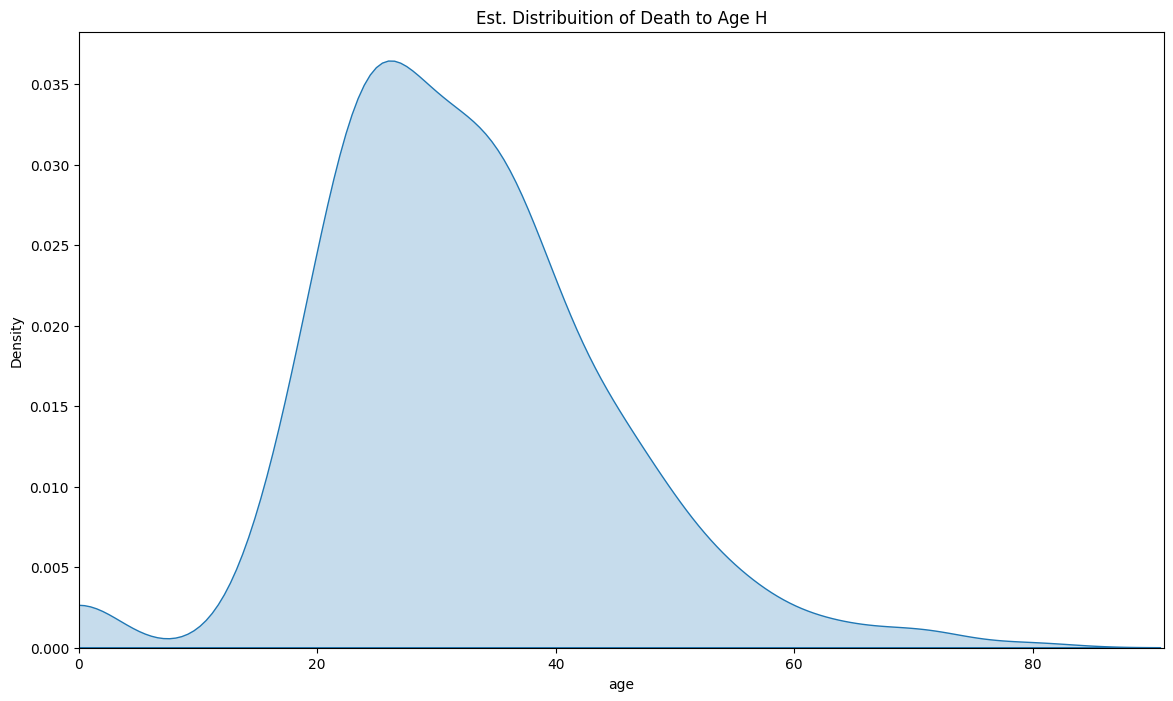

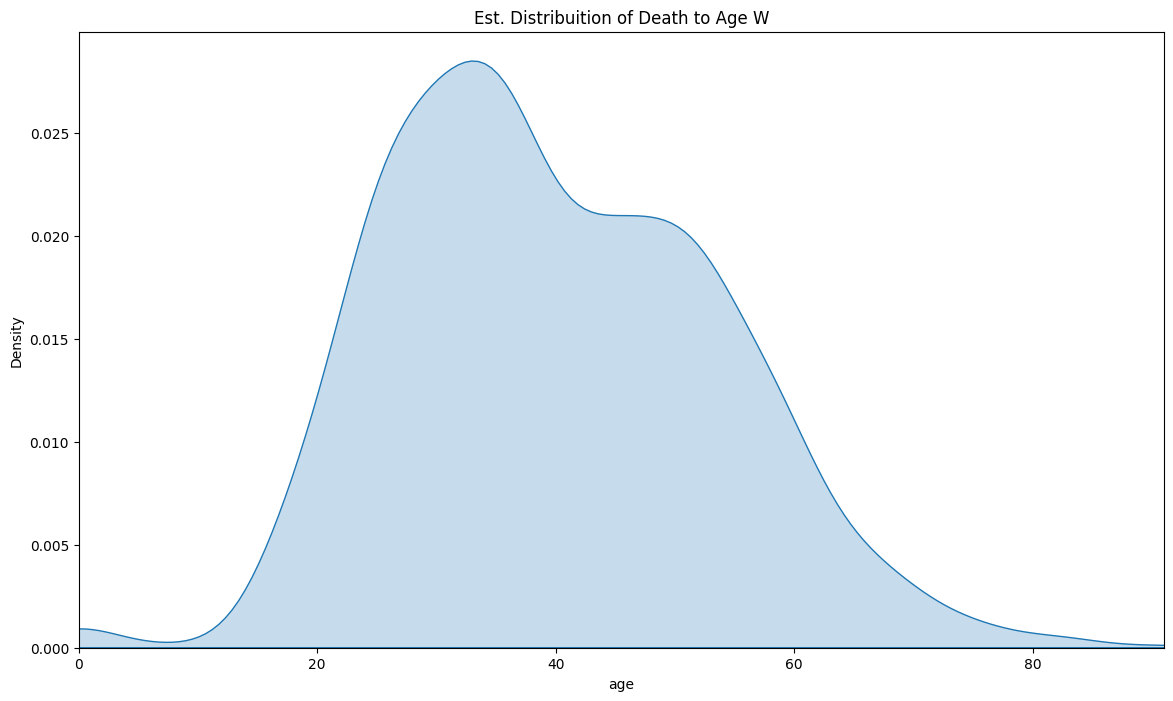

Error in callback <function flush_figures at 0x7d933f3d4dc0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for n in df_fatalities.race:
  df_for_kde = df_fatalities[df_fatalities["race"]==n]
  plt.figure(figsize=(14,8))

  sns.kdeplot(data=df_for_kde,
              x="age",
              fill=True)
  plt.title(f'Est. Distribuition of Death to Age {n}')
  plt.xlim(0, df_age.age.max())

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [37]:
df_fatalities[df_fatalities["city"] == "Aloha"]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
747,890,Phyllis Ilene Jepsen,02/10/15,shot,knife,55.00,F,W,Aloha,OR,True,other,Not fleeing,False


In [25]:
df_race_killed = df_fatalities.groupby("race").count()
df_race_killed

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
0,195,195,195,195,195,195,195,195,195,195,195,195,195
A,39,39,39,39,39,39,39,39,39,39,39,39,39
B,618,618,618,618,618,618,618,618,618,618,618,618,618
H,423,423,423,423,423,423,423,423,423,423,423,423,423
N,31,31,31,31,31,31,31,31,31,31,31,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201


In [28]:
fig = px.bar(df_race_killed, x=df_race_killed.index, y=df_race_killed.id)
fig.update_legends()
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [33]:
print(f"Total percentage of killed with mental illness diagnosed {len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True])/len(df_fatalities) * 100}")

Total percentage of killed with mental illness diagnosed 24.970414201183434


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [49]:
df_city_death = df_fatalities.groupby("city", as_index=False).count()
sorted_city = df_city_death.sort_values(by='id', ascending=False)

In [52]:
fig = px.bar(sorted_city, x=sorted_city.city[:10], y=sorted_city.id[:10])
fig.update_legends()
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [80]:
sorted_city[:10].city

732     Los Angeles
995         Phoenix
578         Houston
241         Chicago
687       Las Vegas
1118    San Antonio
284        Columbus
808           Miami
60           Austin
1217      St. Louis
Name: city, dtype: object

In [130]:
sorted_city_with_race = df_fatalities[df_fatalities['city'].isin(sorted_city[:10].city)]
test = sorted_city_with_race.groupby("race", as_index=False).count()

test2 = sorted_city_with_race.groupby("race", as_index=False).agg({"manner_of_death": pd.Series.count})
print(test2)

for n, m in test2.values:
  print(f"The percentage for {n} race in police killing is: {((m/test2.manner_of_death.sum())*100).round(2)}")



  race  manner_of_death
0    0               17
1    A                2
2    B               87
3    H               62
4    N                4
5    O                1
6    W               60
The percentage for 0 race in police killing is: 7.3
The percentage for A race in police killing is: 0.86
The percentage for B race in police killing is: 37.34
The percentage for H race in police killing is: 26.61
The percentage for N race in police killing is: 1.72
The percentage for O race in police killing is: 0.43
The percentage for W race in police killing is: 25.75


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [131]:
df_fatalities[:2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


In [137]:
danger_state = df_fatalities.groupby("state").count()
danger_state.sort_values(by="id", ascending=False)[:10]

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,,
CA,424,424,424,424,424,424,424,424,424,424,424,424,424
TX,225,225,225,225,225,225,225,225,225,225,225,225,225
FL,154,154,154,154,154,154,154,154,154,154,154,154,154
AZ,118,118,118,118,118,118,118,118,118,118,118,118,118
OH,79,79,79,79,79,79,79,79,79,79,79,79,79
OK,78,78,78,78,78,78,78,78,78,78,78,78,78
CO,74,74,74,74,74,74,74,74,74,74,74,74,74
GA,70,70,70,70,70,70,70,70,70,70,70,70,70
NC,69,69,69,69,69,69,69,69,69,69,69,69,69


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [138]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])

In [145]:
date_kills = df_fatalities.groupby("date").count()
date_kills

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,,,,,,,,,,,,,
2015-01-03,3,3,3,3,3,3,3,3,3,3,3,3,3
2015-01-04,2,2,2,2,2,2,2,2,2,2,2,2,2
2015-01-06,1,1,1,1,1,1,1,1,1,1,1,1,1
2015-01-07,2,2,2,2,2,2,2,2,2,2,2,2,2
2015-01-08,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03,2,2,2,2,2,2,2,2,2,2,2,2,2
2017-12-04,1,1,1,1,1,1,1,1,1,1,1,1,1
2017-12-05,4,4,4,4,4,4,4,4,4,4,4,4,4


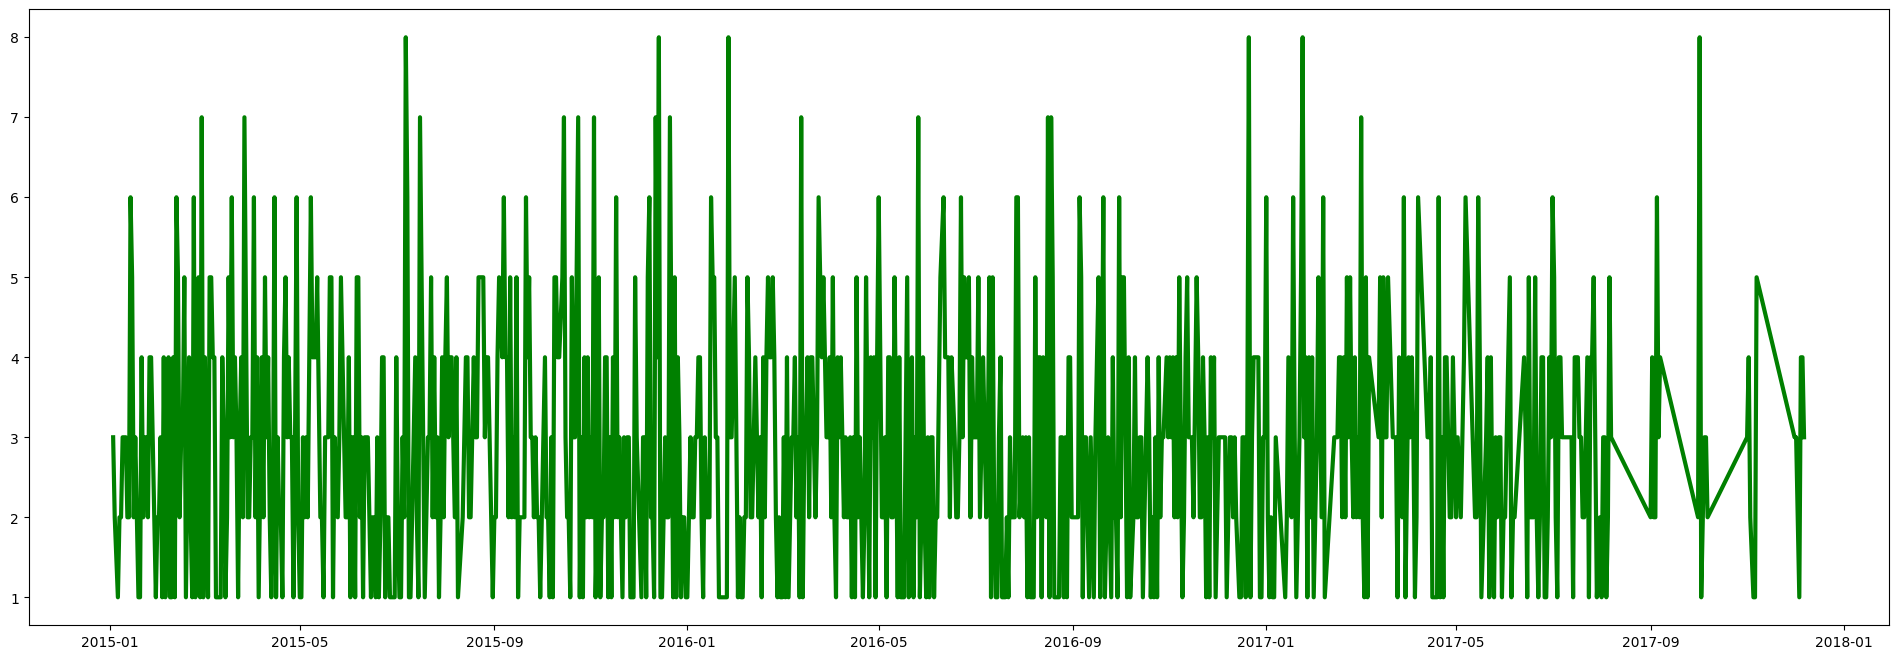

In [149]:
plt.figure(figsize=[24, 8])
plt.plot(date_kills.index,
         date_kills.id,
         color="green",
         linewidth=3
)
plt.show()

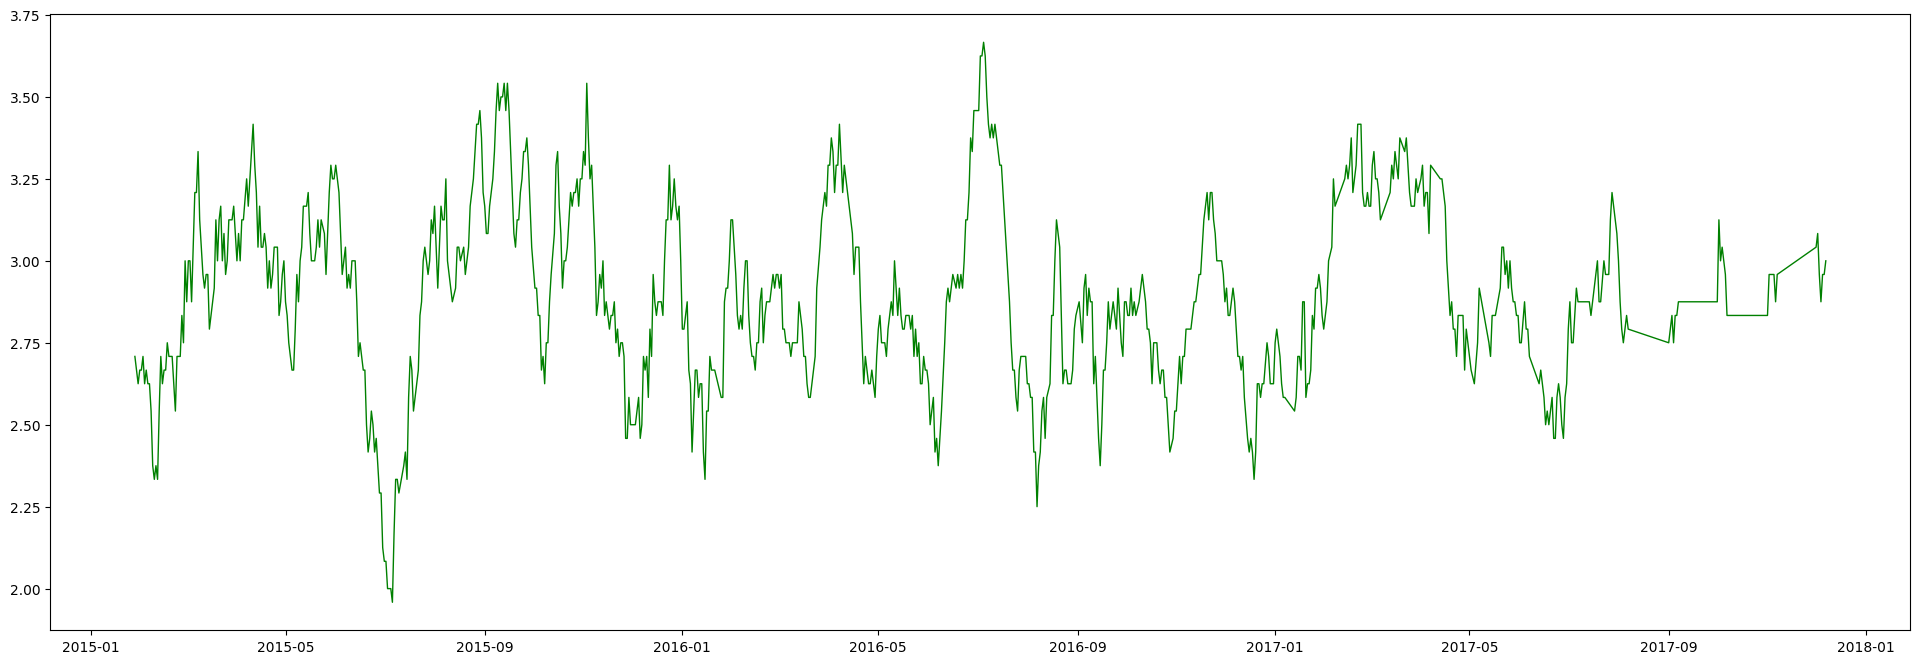

In [153]:
test = date_kills.rolling(window=24).mean()
plt.figure(figsize=[24, 8])
plt.plot(test.index,
         test.id,
         color="green",
         linewidth=1
)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).